In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import time
pd.set_option("display.max_columns", None)

In [2]:
path = "/Users/niharawarawita/Desktop/MSc Project/Data and code/complete_dataset_3subwindows.csv"
data = pd.read_csv(path)
data.head(10)

,participant_id,clothes_id,property_id,property_name,interaction_id,rating,rating_level,rating_level_num,sub_window_num,subwindow_start_time,subwindow_end_time,max_ch1_Hand0,max_ch2_Hand0,max_ch3_Hand0,max_ch4_Hand0,max_ch5_Hand0,max_ch6_Hand0,max_ch7_Hand0,max_ch8_Hand0,mean_ch1_Hand0,mean_ch2_Hand0,mean_ch3_Hand0,mean_ch4_Hand0,mean_ch5_Hand0,mean_ch6_Hand0,mean_ch7_Hand0,mean_ch8_Hand0,std_ch1_Hand0,std_ch2_Hand0,std_ch3_Hand0,std_ch4_Hand0,std_ch5_Hand0,std_ch6_Hand0,std_ch7_Hand0,std_ch8_Hand0,max_ch1_Hand1,max_ch2_Hand1,max_ch3_Hand1,max_ch4_Hand1,max_ch5_Hand1,max_ch6_Hand1,max_ch7_Hand1,max_ch8_Hand1,mean_ch1_Hand1,mean_ch2_Hand1,mean_ch3_Hand1,mean_ch4_Hand1,mean_ch5_Hand1,mean_ch6_Hand1,mean_ch7_Hand1,mean_ch8_Hand1,std_ch1_Hand1,std_ch2_Hand1,std_ch3_Hand1,std_ch4_Hand1,std_ch5_Hand1,std_ch6_Hand1,std_ch7_Hand1,std_ch8_Hand1,max_Ax_Hand0,max_Ay_Hand0,max_Az_Hand0,max_Vx_Hand0,max_Vy_Hand0,max_Vz_Hand0,max_Jx_Hand0,max_Jy_Hand0,max_Jz_Hand0,mean_Ax_Hand0,mean_Ay_Hand0,mean_Az_Hand0,mean_Vx_Hand0,mean_Vy_Hand0,mean_Vz_Hand0,mean_Jx_Hand0,mean_Jy_Hand0,mean_Jz_Hand0,std_Ax_Hand0,std_Ay_Hand0,std_Az_Hand0,std_Vx_Hand0,std_Vy_Hand0,std_Vz_Hand0,std_Jx_Hand0,std_Jy_Hand0,std_Jz_Hand0,max_Ax_Hand1,max_Ay_Hand1,max_Az_Hand1,max_Vx_Hand1,max_Vy_Hand1,max_Vz_Hand1,max_Jx_Hand1,max_Jy_Hand1,max_Jz_Hand1,mean_Ax_Hand1,mean_Ay_Hand1,mean_Az_Hand1,mean_Vx_Hand1,mean_Vy_Hand1,mean_Vz_Hand1,mean_Jx_Hand1,mean_Jy_Hand1,mean_Jz_Hand1,std_Ax_Hand1,std_Ay_Hand1,std_Az_Hand1,std_Vx_Hand1,std_Vy_Hand1,std_Vz_Hand1,std_Jx_Hand1,std_Jy_Hand1,std_Jz_Hand1,max_w_Hand0,max_x_Hand0,max_y_Hand0,max_z_Hand0,max_AVx_Hand0,max_AVy_Hand0,max_AVz_Hand0,max_AAx_Hand0,max_AAy_Hand0,max_AAz_Hand0,max_AJx_Hand0,max_AJy_Hand0,max_AJz_Hand0,mean_w_Hand0,mean_x_Hand0,mean_y_Hand0,mean_z_Hand0,mean_AVx_Hand0,mean_AVy_Hand0,mean_AVz_Hand0,mean_AAx_Hand0,mean_AAy_Hand0,mean_AAz_Hand0,mean_AJx_Hand0,mean_AJy_Hand0,mean_AJz_Hand0,std_w_Hand0,std_x_Hand0,std_y_Hand0,std_z_Hand0,std_AVx_Hand0,std_AVy_Hand0,std_AVz_Hand0,std_AAx_Hand0,std_AAy_Hand0,std_AAz_Hand0,std_AJx_Hand0,std_AJy_Hand0,std_AJz_Hand0,max_w_Hand1,max_x_Hand1,max_y_Hand1,max_z_Hand1,max_AVx_Hand1,max_AVy_Hand1,max_AVz_Hand1,max_AAx_Hand1,max_AAy_Hand1,max_AAz_Hand1,max_AJx_Hand1,max_AJy_Hand1,max_AJz_Hand1,mean_w_Hand1,mean_x_Hand1,mean_y_Hand1,mean_z_Hand1,mean_AVx_Hand1,mean_AVy_Hand1,mean_AVz_Hand1,mean_AAx_Hand1,mean_AAy_Hand1,mean_AAz_Hand1,mean_AJx_Hand1,mean_AJy_Hand1,mean_AJz_Hand1,std_w_Hand1,std_x_Hand1,std_y_Hand1,std_z_Hand1,std_AVx_Hand1,std_AVy_Hand1,std_AVz_Hand1,std_AAx_Hand1,std_AAy_Hand1,std_AAz_Hand1,std_AJx_Hand1,std_AJy_Hand1,std_AJz_Hand1
0,7,14,3,smoothness,1,3,medium,2,1,2021-08-05 13:21:31.481,2021-08-05 13:21:32.468,0.504132,0.620513,0.675978,0.500000,0.759036,0.652406,0.76250,0.666667,0.497498,0.612780,0.665895,0.492285,0.718526,0.636907,0.748853,0.660720,0.002329,0.002760,0.003011,0.002201,0.006194,0.004289,0.003634,0.002595,0.508197,0.929578,0.757225,0.730159,0.497959,0.995918,0.663366,0.580645,0.497102,0.848495,0.692072,0.634859,0.491574,0.511567,0.596728,0.558018,0.003056,0.009851,0.011220,0.016046,0.002283,0.125342,0.014496,0.005100,-0.850708,-0.068771,0.490311,0.000525,0.000406,0.000903,1.269531,1.220703,2.258301,-0.863979,-0.089162,0.468123,-4.589844e-06,1.483398e-05,-1.191406e-05,-0.010928,-0.052313,0.060087,0.006994,0.008424,0.010178,0.000201,0.000180,0.000270,0.599364,0.630856,0.794158,1.023270,0.042786,-0.178879,0.001218,0.001529,0.001429,4.089355,5.468750,3.271484,0.970242,-0.011443,-0.239064,-3.020508e-05,-8.115234e-06,0.000065,0.061211,0.036287,-0.170119,0.017187,0.014988,0.034359,0.000440,0.000417,0.000641,1.262790,1.374306,1.977670,0.179352,0.488418,0.160615,-0.840857,0.133141,0.061469,0.117029,4.332320,2.887801,19.812834,554.574503,316.450316,1338.775861,0.171550,0.486515,0.155002,-0.842509,-0.002358,-0.006487,-0.037808,-0.069210,0.040128,0.213198,-18.896953,-5.997847,29.264918,0.004033,0.001122,0.003172,0.000812,0.034035,0.027288,0.100030,1.808784,1.34

In [3]:
starting_index = 11

In [4]:
print(data.property_name.unique())
print(data.property_id.unique())
print(sorted(data.clothes_id.unique()))

['smoothness' 'thickness' 'warmth' 'flexibility' 'softness' 'enjoyment']
[3 4 5 6 7 8]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36]


In [5]:
# Initialise the random state
num = 183 #
#num = random.randint(1, 500)
print(f"The generated random seed is {num}") #347

The generated random seed is 183


## Section A) Physical properties

### Observe the data

In [6]:
physical_data = data[data.property_name != 'enjoyment']
physical_data.head()

,participant_id,clothes_id,property_id,property_name,interaction_id,rating,rating_level,rating_level_num,sub_window_num,subwindow_start_time,subwindow_end_time,max_ch1_Hand0,max_ch2_Hand0,max_ch3_Hand0,max_ch4_Hand0,max_ch5_Hand0,max_ch6_Hand0,max_ch7_Hand0,max_ch8_Hand0,mean_ch1_Hand0,mean_ch2_Hand0,mean_ch3_Hand0,mean_ch4_Hand0,mean_ch5_Hand0,mean_ch6_Hand0,mean_ch7_Hand0,mean_ch8_Hand0,std_ch1_Hand0,std_ch2_Hand0,std_ch3_Hand0,std_ch4_Hand0,std_ch5_Hand0,std_ch6_Hand0,std_ch7_Hand0,std_ch8_Hand0,max_ch1_Hand1,max_ch2_Hand1,max_ch3_Hand1,max_ch4_Hand1,max_ch5_Hand1,max_ch6_Hand1,max_ch7_Hand1,max_ch8_Hand1,mean_ch1_Hand1,mean_ch2_Hand1,mean_ch3_Hand1,mean_ch4_Hand1,mean_ch5_Hand1,mean_ch6_Hand1,mean_ch7_Hand1,mean_ch8_Hand1,std_ch1_Hand1,std_ch2_Hand1,std_ch3_Hand1,std_ch4_Hand1,std_ch5_Hand1,std_ch6_Hand1,std_ch7_Hand1,std_ch8_Hand1,max_Ax_Hand0,max_Ay_Hand0,max_Az_Hand0,max_Vx_Hand0,max_Vy_Hand0,max_Vz_Hand0,max_Jx_Hand0,max_Jy_Hand0,max_Jz_Hand0,mean_Ax_Hand0,mean_Ay_Hand0,mean_Az_Hand0,mean_Vx_Hand0,mean_Vy_Hand0,mean_Vz_Hand0,mean_Jx_Hand0,mean_Jy_Hand0,mean_Jz_Hand0,std_Ax_Hand0,std_Ay_Hand0,std_Az_Hand0,std_Vx_Hand0,std_Vy_Hand0,std_Vz_Hand0,std_Jx_Hand0,std_Jy_Hand0,std_Jz_Hand0,max_Ax_Hand1,max_Ay_Hand1,max_Az_Hand1,max_Vx_Hand1,max_Vy_Hand1,max_Vz_Hand1,max_Jx_Hand1,max_Jy_Hand1,max_Jz_Hand1,mean_Ax_Hand1,mean_Ay_Hand1,mean_Az_Hand1,mean_Vx_Hand1,mean_Vy_Hand1,mean_Vz_Hand1,mean_Jx_Hand1,mean_Jy_Hand1,mean_Jz_Hand1,std_Ax_Hand1,std_Ay_Hand1,std_Az_Hand1,std_Vx_Hand1,std_Vy_Hand1,std_Vz_Hand1,std_Jx_Hand1,std_Jy_Hand1,std_Jz_Hand1,max_w_Hand0,max_x_Hand0,max_y_Hand0,max_z_Hand0,max_AVx_Hand0,max_AVy_Hand0,max_AVz_Hand0,max_AAx_Hand0,max_AAy_Hand0,max_AAz_Hand0,max_AJx_Hand0,max_AJy_Hand0,max_AJz_Hand0,mean_w_Hand0,mean_x_Hand0,mean_y_Hand0,mean_z_Hand0,mean_AVx_Hand0,mean_AVy_Hand0,mean_AVz_Hand0,mean_AAx_Hand0,mean_AAy_Hand0,mean_AAz_Hand0,mean_AJx_Hand0,mean_AJy_Hand0,mean_AJz_Hand0,std_w_Hand0,std_x_Hand0,std_y_Hand0,std_z_Hand0,std_AVx_Hand0,std_AVy_Hand0,std_AVz_Hand0,std_AAx_Hand0,std_AAy_Hand0,std_AAz_Hand0,std_AJx_Hand0,std_AJy_Hand0,std_AJz_Hand0,max_w_Hand1,max_x_Hand1,max_y_Hand1,max_z_Hand1,max_AVx_Hand1,max_AVy_Hand1,max_AVz_Hand1,max_AAx_Hand1,max_AAy_Hand1,max_AAz_Hand1,max_AJx_Hand1,max_AJy_Hand1,max_AJz_Hand1,mean_w_Hand1,mean_x_Hand1,mean_y_Hand1,mean_z_Hand1,mean_AVx_Hand1,mean_AVy_Hand1,mean_AVz_Hand1,mean_AAx_Hand1,mean_AAy_Hand1,mean_AAz_Hand1,mean_AJx_Hand1,mean_AJy_Hand1,mean_AJz_Hand1,std_w_Hand1,std_x_Hand1,std_y_Hand1,std_z_Hand1,std_AVx_Hand1,std_AVy_Hand1,std_AVz_Hand1,std_AAx_Hand1,std_AAy_Hand1,std_AAz_Hand1,std_AJx_Hand1,std_AJy_Hand1,std_AJz_Hand1
0,7,14,3,smoothness,1,3,medium,2,1,2021-08-05 13:21:31.481,2021-08-05 13:21:32.468,0.504132,0.620513,0.675978,0.500000,0.759036,0.652406,0.76250,0.666667,0.497498,0.612780,0.665895,0.492285,0.718526,0.636907,0.748853,0.660720,0.002329,0.002760,0.003011,0.002201,0.006194,0.004289,0.003634,0.002595,0.508197,0.929578,0.757225,0.730159,0.497959,0.995918,0.663366,0.580645,0.497102,0.848495,0.692072,0.634859,0.491574,0.511567,0.596728,0.558018,0.003056,0.009851,0.011220,0.016046,0.002283,0.125342,0.014496,0.005100,-0.850708,-0.068771,0.490311,0.000525,0.000406,0.000903,1.269531,1.220703,2.258301,-0.863979,-0.089162,0.468123,-0.000005,1.483398e-05,-1.191406e-05,-0.010928,-0.052313,0.060087,0.006994,0.008424,0.010178,0.000201,0.000180,0.000270,0.599364,0.630856,0.794158,1.023270,0.042786,-0.178879,0.001218,0.001529,0.001429,4.089355,5.468750,3.271484,0.970242,-0.011443,-0.239064,-0.000030,-8.115234e-06,0.000065,0.061211,0.036287,-0.170119,0.017187,0.014988,0.034359,0.000440,0.000417,0.000641,1.262790,1.374306,1.977670,0.179352,0.488418,0.160615,-0.840857,0.133141,0.061469,0.117029,4.332320,2.887801,19.812834,554.574503,316.450316,1338.775861,0.171550,0.486515,0.155002,-0.842509,-0.002358,-0.006487,-0.037808,-0.069210,0.040128,0.213198,-18.896953,-5.997847,29.264918,0.004033,0.001122,0.003172,0.000812,0.034035,0.027288,0.100030,1.808784,1.349269,6.5

In [7]:
emg_data = physical_data.iloc[:,:59]
emg_data.head()

,participant_id,clothes_id,property_id,property_name,interaction_id,rating,rating_level,rating_level_num,sub_window_num,subwindow_start_time,subwindow_end_time,max_ch1_Hand0,max_ch2_Hand0,max_ch3_Hand0,max_ch4_Hand0,max_ch5_Hand0,max_ch6_Hand0,max_ch7_Hand0,max_ch8_Hand0,mean_ch1_Hand0,mean_ch2_Hand0,mean_ch3_Hand0,mean_ch4_Hand0,mean_ch5_Hand0,mean_ch6_Hand0,mean_ch7_Hand0,mean_ch8_Hand0,std_ch1_Hand0,std_ch2_Hand0,std_ch3_Hand0,std_ch4_Hand0,std_ch5_Hand0,std_ch6_Hand0,std_ch7_Hand0,std_ch8_Hand0,max_ch1_Hand1,max_ch2_Hand1,max_ch3_Hand1,max_ch4_Hand1,max_ch5_Hand1,max_ch6_Hand1,max_ch7_Hand1,max_ch8_Hand1,mean_ch1_Hand1,mean_ch2_Hand1,mean_ch3_Hand1,mean_ch4_Hand1,mean_ch5_Hand1,mean_ch6_Hand1,mean_ch7_Hand1,mean_ch8_Hand1,std_ch1_Hand1,std_ch2_Hand1,std_ch3_Hand1,std_ch4_Hand1,std_ch5_Hand1,std_ch6_Hand1,std_ch7_Hand1,std_ch8_Hand1
0,7,14,3,smoothness,1,3,medium,2,1,2021-08-05 13:21:31.481,2021-08-05 13:21:32.468,0.504132,0.620513,0.675978,0.500000,0.759036,0.652406,0.76250,0.666667,0.497498,0.612780,0.665895,0.492285,0.718526,0.636907,0.748853,0.660720,0.002329,0.002760,0.003011,0.002201,0.006194,0.004289,0.003634,0.002595,0.508197,0.929578,0.757225,0.730159,0.497959,0.995918,0.663366,0.580645,0.497102,0.848495,0.692072,0.634859,0.491574,0.511567,0.596728,0.558018,0.003056,0.009851,0.011220,0.016046,0.002283,0.125342,0.014496,0.005100
1,7,14,3,smoothness,1,3,medium,2,2,2021-08-05 13:21:32.495,2021-08-05 13:21:33.464,0.504132,0.620513,0.675978,0.500000,0.759036,0.663102,0.75625,0.666667,0.497417,0.612789,0.666077,0.492186,0.718908,0.637194,0.748828,0.660428,0.002321,0.002785,0.002810,0.002245,0.006368,0.004426,0.002994,0.002613,0.508197,0.957746,0.809249,0.746032,0.497959,0.995918,0.683168,0.585254,0.496918,0.848890,0.692686,0.634612,0.491212,0.492734,0.596994,0.558059,0.003603,0.012522,0.017839,0.015241,0.002220,0.168270,0.014712,0.007247
2,7,14,3,smoothness,1,3,medium,2,3,2021-08-05 13:21:33.513,2021-08-05 13:21:46.475,0.685950,0.728205,0.849162,0.607438,0.777108,0.700535,0.87500,0.733333,0.497469,0.612832,0.666206,0.492255,0.718535,0.637126,0.748788,0.660685,0.011144,0.006879,0.009090,0.007845,0.005614,0.004051,0.005506,0.004440,0.516393,0.936620,0.832370,0.751323,0.995918,0.995918,0.698020,0.622120,0.496948,0.848779,0.691786,0.634099,0.486646,0.498963,0.595900,0.557786,0.003032,0.007777,0.009667,0.009077,0.043924,0.108942,0.010389,0.006009
3,7,14,4,thickness,2,5,medium,2,1,2021-08-05 13:22:02.060,2021-08-05 13:22:03.029,0.512397,0.661538,0.754190,0.512397,0.759036,0.673797,0.76250,0.677778,0.497326,0.612893,0.666100,0.484996,0.718373,0.637000,0.748664,0.660854,0.004125,0.014409,0.021173,0.058099,0.007076,0.005177,0.005281,0.004803,0.516393,0.873239,0.716763,0.666667,0.493878,0.497959,0.643564,0.580645,0.496862,0.848702,0.691813,0.634084,0.491064,0.493647,0.593827,0.557622,0.003913,0.006136,0.005968,0.004635,0.002087,0.001368,0.008473,0.005300
4,7,14,4,thickness,2,5,medium,2,2,2021-08-05 13:22:03.061,2021-08-05 13:22:04.047,0.504132,0.635897,0.737430,1.000000,0.746988,0.652406,0.76250,0.672222,0.497305,0.612760,0.666103,0.539813,0.720609,0.636990,0.748779,0.661079,0.003440,0.007323,0.011248,0.095872,0.007634,0.003822,0.004761,0.004264,0.512295,0.866197,0.710983,0.650794,0.497959,0.497959,0.722772,0.599078,0.496943,0.848932,0.691707,0.633865,0.491129,0.493722,0.594159,0.558040,0.003295,0.004746,0.003927,0.004114,0.002148,0.001221,0.017247,0.007301


In [8]:
print(physical_data.shape)
print(emg_data.shape)

(1260, 191)
(1260, 59)


<AxesSubplot:>

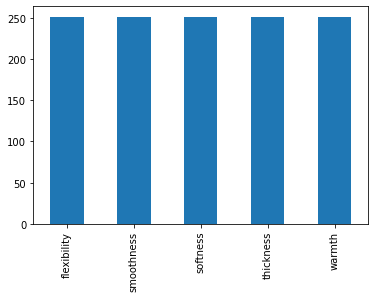

In [9]:
physical_data['property_name'].value_counts().sort_index().plot.bar()

Balanced data. Each property has approximately the same number of samples

<AxesSubplot:>

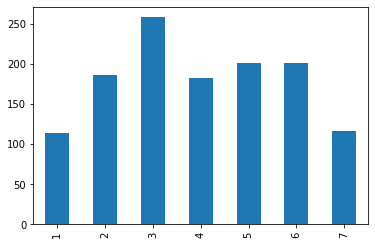

In [10]:
physical_data['rating'].value_counts().sort_index().plot.bar()

Modal answer was 6. Very few people said 1

<AxesSubplot:>

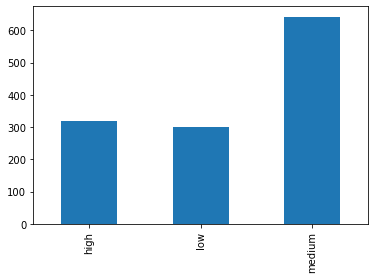

In [11]:
physical_data['rating_level'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

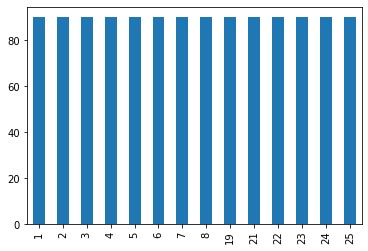

In [12]:
physical_data['participant_id'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

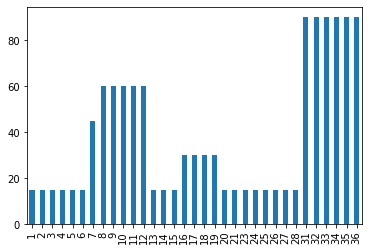

In [13]:
physical_data['clothes_id'].value_counts().sort_index().plot.bar()

Unbalanced data. More than double the number of observations for medium than low

### Task 1: Predicting the property based on the provided data (excluding enjoyment data)

#### Step 1: LOPOCV (Leave One Participant Out CV)

In [14]:
# Note: predicting_feature = 'property_id' or 'rating'

def rf_LOPOCV(data, num_inner_folds=5, predicting_feature = 'property_id', random_state=num, starting_index=10):
    if predicting_feature == 'property_id':
        print(f'Classification accuracy when predicting properties at random : {round(1/len(data.property_id.unique())*100,2)}% ')
    else:
        print(f'Classification accuracy when predicting ratings at random : {round(1/len(data.rating_level_num.unique())*100,2)}% ')
    print('__________________________________________')

    if predicting_feature == 'property_id':
        macro_f1_lst = []
    elif predicting_feature == 'rating_level_num':
        weighted_f1_lst = []    
    micro_f1_lst = []
    acc_lst = []
    total_conf_mat = 0

    for participant in sorted(data.participant_id.unique()): #range(19,26):    

        # Split the data into training and testing
        training_data = data[data.participant_id != participant]
        testing_data = data[data.participant_id == participant]

        # Data preparation
        #starting_index = 11
        X_train = training_data.iloc[:,starting_index:].values        
        y_train = training_data[predicting_feature].values
        X_test = testing_data.iloc[:,starting_index:].values        
        y_test = testing_data[predicting_feature].values
        
       
        # Configure the cross-validation procedure
        cv_inner = KFold(n_splits=num_inner_folds, shuffle=True, random_state=num)

        # Define the model
        rf_model = RandomForestClassifier(random_state=num)

        # Create a dictionary with the hyperparameters to tune
        features_dict = dict()
        features_dict['n_estimators'] = [100, 500, 1000, 1500]

        # Define the Grid Search
        if predicting_feature == 'property_id':
            search = GridSearchCV(rf_model, features_dict, scoring='f1_macro', cv=cv_inner, refit=True) #accuracy
        elif predicting_feature == 'rating_level_num':
            search = GridSearchCV(rf_model, features_dict, scoring='f1_weighted', cv=cv_inner, refit=True) #accuracy

        # Execute the search
        result = search.fit(X_train, y_train)

        # Obtain the best performing model fit on the whole training set
        best_rf_model = result.best_estimator_

        # Using the model, obtain predictions for the test data
        predictions = best_rf_model.predict(X_test)

        # Evaluate the model
        if predicting_feature == 'property_id':
            conf_mat = confusion_matrix(y_test, predictions, labels=[0, 1, 2, 3, 4])
            macro_f1_score = f1_score(y_test, predictions, average='macro') 
            macro_f1_lst.append(macro_f1_score) 
        elif predicting_feature == 'rating_level_num':
            conf_mat = confusion_matrix(y_test, predictions, labels=[1,2,3])
            weighted_f1_score = f1_score(y_test, predictions, average='weighted') 
            weighted_f1_lst.append(weighted_f1_score)
            
        total_conf_mat += conf_mat
        micro_f1_score = f1_score(y_test, predictions, average='micro')  
        micro_f1_lst.append(micro_f1_score)
        acc = accuracy_score(y_test, predictions)
        acc_lst.append(acc)

        print(f'Leaving participant {participant} out {result.best_params_}:') 
        print("(1) Confusion matrix:\n", conf_mat)
        print(f"(2) Micro F1 score = {round(micro_f1_score,2)}")
        if predicting_feature == 'property_id':
            print(f"(3) Macro F1 score = {round(macro_f1_score,2)}")
        elif predicting_feature == 'rating_level_num':
            print(f"(3) Weighted F1 score = {round(weighted_f1_score,2)}")            
        print(f"(4) Percentage Classification accuracy = {round(acc*100,2)}%")

        print('__________________________________________')

    avg_micro_f1_score = sum(micro_f1_lst) / len(micro_f1_lst)
    if predicting_feature == 'property_id':
        avg_macro_f1_score = sum(macro_f1_lst) / len(macro_f1_lst)
    elif predicting_feature == 'rating_level_num':
        avg_weighted_f1_score = sum(weighted_f1_lst) / len(weighted_f1_lst)               
    avg_acc = sum(acc_lst) / len(acc_lst)   
    
    print(f'Using Leave One Participant Out CV (LOPOCV):') 
    print("(1) Confusion matrix:\n", total_conf_mat)
    print(f"(2) Average micro F1 score = {round(avg_micro_f1_score,2)}")
    if predicting_feature == 'property_id':
        print(f"(3) Average macro F1 score = {round(avg_macro_f1_score,2)}")
    elif predicting_feature == 'rating_level_num':
        print(f"(3) Average weighted F1 score = {round(avg_weighted_f1_score,2)}")      
    print(f"(4) Average Percentage Classification accuracy = {round(avg_acc*100,2)}%")
          

##### Using all features (180 features)

In [15]:
t1 = time.time()
#rf_LOPOCV(data=physical_data, num_inner_folds=5, predicting_feature = 'property_id', random_state=num, starting_index=starting_index)
t2 = time.time()

In [16]:
t2-t1

0.00019502639770507812

##### Using only emg features (48 features)

In [17]:
t3 = time.time()
#rf_LOPOCV(data=emg_data, num_inner_folds=5, predicting_feature = 'property_id', random_state=num, starting_index=starting_index)
t4 = time.time()

In [18]:
t4-t3

7.581710815429688e-05

rf_LOCOCV_properties(data=physical_data, num_inner_folds=3, predicting_feature = 'property_id', random_state=num) 


### Task 2: Predicting the rating of the property based on the data

#### Step 1: LOPOCV (Leave One Participant Out CV)

In [19]:
def one_hot_encode_properties(df, predicting_feature = 'property_id'):
    # Create an instance of a one-hot-encoder
    encoder = OneHotEncoder(handle_unknown='ignore')

    # Perform one-hot encoding on the specified column 
    encoder_df = pd.DataFrame(encoder.fit_transform(df[[predicting_feature]]).toarray())
    
    return encoder_df


In [20]:
# One hot encode properties and add this to physical data
properties_one_hot_encoded = one_hot_encode_properties(df=physical_data, predicting_feature = 'property_id')
print(properties_one_hot_encoded.shape, physical_data.shape)
new_physical_data = pd.concat([physical_data.reset_index(drop=True), properties_one_hot_encoded.reset_index(drop=True)], axis = 1)
print(new_physical_data.shape)
new_physical_data.head()

(1260, 5) (1260, 191)
(1260, 196)


,participant_id,clothes_id,property_id,property_name,interaction_id,rating,rating_level,rating_level_num,sub_window_num,subwindow_start_time,subwindow_end_time,max_ch1_Hand0,max_ch2_Hand0,max_ch3_Hand0,max_ch4_Hand0,max_ch5_Hand0,max_ch6_Hand0,max_ch7_Hand0,max_ch8_Hand0,mean_ch1_Hand0,mean_ch2_Hand0,mean_ch3_Hand0,mean_ch4_Hand0,mean_ch5_Hand0,mean_ch6_Hand0,mean_ch7_Hand0,mean_ch8_Hand0,std_ch1_Hand0,std_ch2_Hand0,std_ch3_Hand0,std_ch4_Hand0,std_ch5_Hand0,std_ch6_Hand0,std_ch7_Hand0,std_ch8_Hand0,max_ch1_Hand1,max_ch2_Hand1,max_ch3_Hand1,max_ch4_Hand1,max_ch5_Hand1,max_ch6_Hand1,max_ch7_Hand1,max_ch8_Hand1,mean_ch1_Hand1,mean_ch2_Hand1,mean_ch3_Hand1,mean_ch4_Hand1,mean_ch5_Hand1,mean_ch6_Hand1,mean_ch7_Hand1,mean_ch8_Hand1,std_ch1_Hand1,std_ch2_Hand1,std_ch3_Hand1,std_ch4_Hand1,std_ch5_Hand1,std_ch6_Hand1,std_ch7_Hand1,std_ch8_Hand1,max_Ax_Hand0,max_Ay_Hand0,max_Az_Hand0,max_Vx_Hand0,max_Vy_Hand0,max_Vz_Hand0,max_Jx_Hand0,max_Jy_Hand0,max_Jz_Hand0,mean_Ax_Hand0,mean_Ay_Hand0,mean_Az_Hand0,mean_Vx_Hand0,mean_Vy_Hand0,mean_Vz_Hand0,mean_Jx_Hand0,mean_Jy_Hand0,mean_Jz_Hand0,std_Ax_Hand0,std_Ay_Hand0,std_Az_Hand0,std_Vx_Hand0,std_Vy_Hand0,std_Vz_Hand0,std_Jx_Hand0,std_Jy_Hand0,std_Jz_Hand0,max_Ax_Hand1,max_Ay_Hand1,max_Az_Hand1,max_Vx_Hand1,max_Vy_Hand1,max_Vz_Hand1,max_Jx_Hand1,max_Jy_Hand1,max_Jz_Hand1,mean_Ax_Hand1,mean_Ay_Hand1,mean_Az_Hand1,mean_Vx_Hand1,mean_Vy_Hand1,mean_Vz_Hand1,mean_Jx_Hand1,mean_Jy_Hand1,mean_Jz_Hand1,std_Ax_Hand1,std_Ay_Hand1,std_Az_Hand1,std_Vx_Hand1,std_Vy_Hand1,std_Vz_Hand1,std_Jx_Hand1,std_Jy_Hand1,std_Jz_Hand1,max_w_Hand0,max_x_Hand0,max_y_Hand0,max_z_Hand0,max_AVx_Hand0,max_AVy_Hand0,max_AVz_Hand0,max_AAx_Hand0,max_AAy_Hand0,max_AAz_Hand0,max_AJx_Hand0,max_AJy_Hand0,max_AJz_Hand0,mean_w_Hand0,mean_x_Hand0,mean_y_Hand0,mean_z_Hand0,mean_AVx_Hand0,mean_AVy_Hand0,mean_AVz_Hand0,mean_AAx_Hand0,mean_AAy_Hand0,mean_AAz_Hand0,mean_AJx_Hand0,mean_AJy_Hand0,mean_AJz_Hand0,std_w_Hand0,std_x_Hand0,std_y_Hand0,std_z_Hand0,std_AVx_Hand0,std_AVy_Hand0,std_AVz_Hand0,std_AAx_Hand0,std_AAy_Hand0,std_AAz_Hand0,std_AJx_Hand0,std_AJy_Hand0,std_AJz_Hand0,max_w_Hand1,max_x_Hand1,max_y_Hand1,max_z_Hand1,max_AVx_Hand1,max_AVy_Hand1,max_AVz_Hand1,max_AAx_Hand1,max_AAy_Hand1,max_AAz_Hand1,max_AJx_Hand1,max_AJy_Hand1,max_AJz_Hand1,mean_w_Hand1,mean_x_Hand1,mean_y_Hand1,mean_z_Hand1,mean_AVx_Hand1,mean_AVy_Hand1,mean_AVz_Hand1,mean_AAx_Hand1,mean_AAy_Hand1,mean_AAz_Hand1,mean_AJx_Hand1,mean_AJy_Hand1,mean_AJz_Hand1,std_w_Hand1,std_x_Hand1,std_y_Hand1,std_z_Hand1,std_AVx_Hand1,std_AVy_Hand1,std_AVz_Hand1,std_AAx_Hand1,std_AAy_Hand1,std_AAz_Hand1,std_AJx_Hand1,std_AJy_Hand1,std_AJz_Hand1,0,1,2,3,4
0,7,14,3,smoothness,1,3,medium,2,1,2021-08-05 13:21:31.481,2021-08-05 13:21:32.468,0.504132,0.620513,0.675978,0.500000,0.759036,0.652406,0.76250,0.666667,0.497498,0.612780,0.665895,0.492285,0.718526,0.636907,0.748853,0.660720,0.002329,0.002760,0.003011,0.002201,0.006194,0.004289,0.003634,0.002595,0.508197,0.929578,0.757225,0.730159,0.497959,0.995918,0.663366,0.580645,0.497102,0.848495,0.692072,0.634859,0.491574,0.511567,0.596728,0.558018,0.003056,0.009851,0.011220,0.016046,0.002283,0.125342,0.014496,0.005100,-0.850708,-0.068771,0.490311,0.000525,0.000406,0.000903,1.269531,1.220703,2.258301,-0.863979,-0.089162,0.468123,-0.000005,1.483398e-05,-1.191406e-05,-0.010928,-0.052313,0.060087,0.006994,0.008424,0.010178,0.000201,0.000180,0.000270,0.599364,0.630856,0.794158,1.023270,0.042786,-0.178879,0.001218,0.001529,0.001429,4.089355,5.468750,3.271484,0.970242,-0.011443,-0.239064,-0.000030,-8.115234e-06,0.000065,0.061211,0.036287,-0.170119,0.017187,0.014988,0.034359,0.000440,0.000417,0.000641,1.262790,1.374306,1.977670,0.179352,0.488418,0.160615,-0.840857,0.133141,0.061469,0.117029,4.332320,2.887801,19.812834,554.574503,316.450316,1338.775861,0.171550,0.486515,0.155002,-0.842509,-0.002358,-0.006487,-0.037808,-0.069210,0.040128,0.213198,-18.896953,-5.997847,29.264918,0.004033,0.001122,0.003172,0.000812,0.034035,0.027288,0.100030,1.808784,1.

In [21]:
# One hot encode properties and add this to emg data
emg_properties_one_hot_encoded = one_hot_encode_properties(df=emg_data, predicting_feature = 'property_id')
print(emg_properties_one_hot_encoded.shape, emg_data.shape)
new_emg_data = pd.concat([emg_data.reset_index(drop=True), emg_properties_one_hot_encoded.reset_index(drop=True)], axis = 1)
print(new_emg_data.shape)
new_emg_data.head()

(1260, 5) (1260, 59)
(1260, 64)


,participant_id,clothes_id,property_id,property_name,interaction_id,rating,rating_level,rating_level_num,sub_window_num,subwindow_start_time,subwindow_end_time,max_ch1_Hand0,max_ch2_Hand0,max_ch3_Hand0,max_ch4_Hand0,max_ch5_Hand0,max_ch6_Hand0,max_ch7_Hand0,max_ch8_Hand0,mean_ch1_Hand0,mean_ch2_Hand0,mean_ch3_Hand0,mean_ch4_Hand0,mean_ch5_Hand0,mean_ch6_Hand0,mean_ch7_Hand0,mean_ch8_Hand0,std_ch1_Hand0,std_ch2_Hand0,std_ch3_Hand0,std_ch4_Hand0,std_ch5_Hand0,std_ch6_Hand0,std_ch7_Hand0,std_ch8_Hand0,max_ch1_Hand1,max_ch2_Hand1,max_ch3_Hand1,max_ch4_Hand1,max_ch5_Hand1,max_ch6_Hand1,max_ch7_Hand1,max_ch8_Hand1,mean_ch1_Hand1,mean_ch2_Hand1,mean_ch3_Hand1,mean_ch4_Hand1,mean_ch5_Hand1,mean_ch6_Hand1,mean_ch7_Hand1,mean_ch8_Hand1,std_ch1_Hand1,std_ch2_Hand1,std_ch3_Hand1,std_ch4_Hand1,std_ch5_Hand1,std_ch6_Hand1,std_ch7_Hand1,std_ch8_Hand1,0,1,2,3,4
0,7,14,3,smoothness,1,3,medium,2,1,2021-08-05 13:21:31.481,2021-08-05 13:21:32.468,0.504132,0.620513,0.675978,0.500000,0.759036,0.652406,0.76250,0.666667,0.497498,0.612780,0.665895,0.492285,0.718526,0.636907,0.748853,0.660720,0.002329,0.002760,0.003011,0.002201,0.006194,0.004289,0.003634,0.002595,0.508197,0.929578,0.757225,0.730159,0.497959,0.995918,0.663366,0.580645,0.497102,0.848495,0.692072,0.634859,0.491574,0.511567,0.596728,0.558018,0.003056,0.009851,0.011220,0.016046,0.002283,0.125342,0.014496,0.005100,1.0,0.0,0.0,0.0,0.0
1,7,14,3,smoothness,1,3,medium,2,2,2021-08-05 13:21:32.495,2021-08-05 13:21:33.464,0.504132,0.620513,0.675978,0.500000,0.759036,0.663102,0.75625,0.666667,0.497417,0.612789,0.666077,0.492186,0.718908,0.637194,0.748828,0.660428,0.002321,0.002785,0.002810,0.002245,0.006368,0.004426,0.002994,0.002613,0.508197,0.957746,0.809249,0.746032,0.497959,0.995918,0.683168,0.585254,0.496918,0.848890,0.692686,0.634612,0.491212,0.492734,0.596994,0.558059,0.003603,0.012522,0.017839,0.015241,0.002220,0.168270,0.014712,0.007247,1.0,0.0,0.0,0.0,0.0
2,7,14,3,smoothness,1,3,medium,2,3,2021-08-05 13:21:33.513,2021-08-05 13:21:46.475,0.685950,0.728205,0.849162,0.607438,0.777108,0.700535,0.87500,0.733333,0.497469,0.612832,0.666206,0.492255,0.718535,0.637126,0.748788,0.660685,0.011144,0.006879,0.009090,0.007845,0.005614,0.004051,0.005506,0.004440,0.516393,0.936620,0.832370,0.751323,0.995918,0.995918,0.698020,0.622120,0.496948,0.848779,0.691786,0.634099,0.486646,0.498963,0.595900,0.557786,0.003032,0.007777,0.009667,0.009077,0.043924,0.108942,0.010389,0.006009,1.0,0.0,0.0,0.0,0.0
3,7,14,4,thickness,2,5,medium,2,1,2021-08-05 13:22:02.060,2021-08-05 13:22:03.029,0.512397,0.661538,0.754190,0.512397,0.759036,0.673797,0.76250,0.677778,0.497326,0.612893,0.666100,0.484996,0.718373,0.637000,0.748664,0.660854,0.004125,0.014409,0.021173,0.058099,0.007076,0.005177,0.005281,0.004803,0.516393,0.873239,0.716763,0.666667,0.493878,0.497959,0.643564,0.580645,0.496862,0.848702,0.691813,0.634084,0.491064,0.493647,0.593827,0.557622,0.003913,0.006136,0.005968,0.004635,0.002087,0.001368,0.008473,0.005300,0.0,1.0,0.0,0.0,0.0
4,7,14,4,thickness,2,5,medium,2,2,2021-08-05 13:22:03.061,2021-08-05 13:22:04.047,0.504132,0.635897,0.737430,1.000000,0.746988,0.652406,0.76250,0.672222,0.497305,0.612760,0.666103,0.539813,0.720609,0.636990,0.748779,0.661079,0.003440,0.007323,0.011248,0.095872,0.007634,0.003822,0.004761,0.004264,0.512295,0.866197,0.710983,0.650794,0.497959,0.497959,0.722772,0.599078,0.496943,0.848932,0.691707,0.633865,0.491129,0.493722,0.594159,0.558040,0.003295,0.004746,0.003927,0.004114,0.002148,0.001221,0.017247,0.007301,0.0,1.0,0.0,0.0,0.0


##### Using all features (180 features)

In [22]:
t5 = time.time()
rf_LOPOCV(data=new_physical_data, num_inner_folds=5, predicting_feature = 'rating_level_num', random_state=num, starting_index=starting_index)
t6=time.time()

Classification accuracy when predicting ratings at random : 33.33% 
__________________________________________
Leaving participant 1 out {'n_estimators': 1500}:
(1) Confusion matrix:
 [[ 0 30  0]
 [ 0 45  0]
 [ 0 15  0]]
(2) Micro F1 score = 0.5
(3) Weighted F1 score = 0.33
(4) Percentage Classification accuracy = 50.0%
__________________________________________
Leaving participant 2 out {'n_estimators': 100}:
(1) Confusion matrix:
 [[ 1 37  1]
 [ 5 45  1]
 [ 0  0  0]]
(2) Micro F1 score = 0.51
(3) Weighted F1 score = 0.4
(4) Percentage Classification accuracy = 51.11%
__________________________________________
Leaving participant 3 out {'n_estimators': 1500}:
(1) Confusion matrix:
 [[ 0 36  0]
 [ 4 35  0]
 [ 0 15  0]]
(2) Micro F1 score = 0.39
(3) Weighted F1 score = 0.24
(4) Percentage Classification accuracy = 38.89%
__________________________________________
Leaving participant 4 out {'n_estimators': 500}:
(1) Confusion matrix:
 [[ 3 21  0]
 [ 2 55  0]
 [ 0  9  0]]
(2) Micro F1 sco

In [23]:
t6-t5

2286.7254519462585

##### Using only emg features (48 features)

In [24]:
t7 = time.time()
rf_LOPOCV(data=new_emg_data, num_inner_folds=5, predicting_feature = 'rating_level_num', random_state=num, starting_index=starting_index)
t8 = time.time()

Classification accuracy when predicting ratings at random : 33.33% 
__________________________________________
Leaving participant 1 out {'n_estimators': 1500}:
(1) Confusion matrix:
 [[ 0 30  0]
 [ 0 45  0]
 [ 0 15  0]]
(2) Micro F1 score = 0.5
(3) Weighted F1 score = 0.33
(4) Percentage Classification accuracy = 50.0%
__________________________________________
Leaving participant 2 out {'n_estimators': 100}:
(1) Confusion matrix:
 [[ 1 38  0]
 [ 2 47  2]
 [ 0  0  0]]
(2) Micro F1 score = 0.53
(3) Weighted F1 score = 0.41
(4) Percentage Classification accuracy = 53.33%
__________________________________________
Leaving participant 3 out {'n_estimators': 500}:
(1) Confusion matrix:
 [[ 0 36  0]
 [ 0 39  0]
 [ 1 14  0]]
(2) Micro F1 score = 0.43
(3) Weighted F1 score = 0.26
(4) Percentage Classification accuracy = 43.33%
__________________________________________
Leaving participant 4 out {'n_estimators': 1000}:
(1) Confusion matrix:
 [[ 3 18  3]
 [ 5 50  2]
 [ 0  9  0]]
(2) Micro F1 sc

In [25]:
t8-t7

1872.9504823684692

### Unnecessary code

In [26]:
def rf_LOPOCV_rating(data, num_inner_folds=5, predicting_feature = 'rating_level_num', random_state=num):
    lst = ['smoothness', 'thickness', 'warmth', 'flexibility', 'softness']#, 'enjoyment']
    #print(f'Classification accuracy when predicting properties at random: {round((1/7)*100,2)}% ')
    for prop in lst:
        # Create dataset
        property_data = data[data.property_name == prop]
        
        print(f"For {prop}:")
        rf_LOPOCV_properties(data=property_data, num_inner_folds=5, predicting_feature = 'rating_level_num', random_state=num)
        print('____________________________________________________________________________________')
        

#### Step 2: LOCOCV (Leave One Cloth(Sock) Out CV)

In [27]:
def rf_LOCOCV_rating(data, num_inner_folds=5, predicting_feature = 'rating_level_num', random_state=num):
    lst = ['smoothness', 'thickness', 'warmth', 'flexibility', 'softness']
    for prop in lst:
        # Create dataset
        property_data = data[data.property_name == prop]
        
        print(f"For {prop}:")
        rf_LOCOCV_properties(data=property_data, num_inner_folds=5, predicting_feature = 'rating_level_num', random_state=num)
        print('____________________________________________________________________________________')
        

rf_LOCOCV_rating(data=physical_data, num_inner_folds=3, predicting_feature = 'rating_level_num', random_state=num)
    

 Section B) Affective properties - Enjoyment

##### Step 2: LOCOCV (Leave One Cloth(Sock) Out CV)

 Note: predicting_feature = 'property_id' or 'rating'

def rf_LOCOCV_properties(data, num_inner_folds=5, predicting_feature = 'property_id', random_state=num):
    if predicting_feature == 'property_id':
        print(f'Classification accuracy when predicting properties at random : {round(1/len(data.property_id.unique())*100,2)}% ')
    else:
        print(f'Classification accuracy when predicting ratings at random : {round(1/len(data.rating_level_num.unique())*100,2)}% ')
    print('__________________________________________')
        
    if predicting_feature == 'property_id':
        macro_f1_lst = []
    elif predicting_feature == 'rating_level_num':
        weighted_f1_lst = []    
    micro_f1_lst = []
    acc_lst = []
    for cloth_id in sorted(data.clothes_id.unique()): #range(1,7):      
        # Split the data into training and testing
        training_data = data[data.clothes_id != cloth_id]
        testing_data = data[data.clothes_id == cloth_id]
        
        # Data preparation
        starting_index = 11
        X_train = training_data.iloc[:,starting_index:].values        
        y_train = training_data[predicting_feature].values
        X_test = testing_data.iloc[:,starting_index:].values        
        y_test = testing_data[predicting_feature].values
        print(y_test.shape)
        
        # Configure the cross-validation procedure
        cv_inner = KFold(n_splits=num_inner_folds, shuffle=True, random_state=num)
        
        # Define the model
        rf_model = RandomForestClassifier(random_state=num)
        
        # Create a dictionary with the hyperparameters to tune
        features_dict = dict()
        features_dict['n_estimators'] = [100, 500, 1000, 1500]
        
        # Define the Grid Search
        if predicting_feature == 'property_id':
            search = GridSearchCV(rf_model, features_dict, scoring='f1_macro', cv=cv_inner, refit=True) #accuracy
        elif predicting_feature == 'rating_level_num':
            search = GridSearchCV(rf_model, features_dict, scoring='f1_weighted', cv=cv_inner, refit=True) #accuracy
        
        # Execute the search
        result = search.fit(X_train, y_train)    
        
        # Obtain the best performing model fit on the whole training set
        best_rf_model = result.best_estimator_
        
        # Using the model, obtain predictions for the test data
        predictions = best_rf_model.predict(X_test)
        
        # Evaluate the model
        if predicting_feature == 'property_id':
            conf_mat = confusion_matrix(y_test, predictions, labels=[3, 4, 5, 6, 7])
            macro_f1_score = f1_score(y_test, predictions, average='macro') 
            macro_f1_lst.append(macro_f1_score) 
        elif predicting_feature == 'rating_level_num':
            conf_mat = confusion_matrix(y_test, predictions, labels=[1,2,3])
            weighted_f1_score = f1_score(y_test, predictions, average='weighted') 
            weighted_f1_lst.append(weighted_f1_score) 
            
        micro_f1_score = f1_score(y_test, predictions, average='micro')  
        micro_f1_lst.append(micro_f1_score)
        acc = accuracy_score(y_test, predictions)
        acc_lst.append(acc)
        
        print(f'Leaving cloth with clothes_id {cloth_id} out {result.best_params_}:') 
        print("(1) Confusion matrix:\n", conf_mat)
        print(f"(2) Micro F1 score = {round(micro_f1_score,2)}")
        if predicting_feature == 'property_id':
            print(f"(3) Macro F1 score = {round(macro_f1_score,2)}")
        elif predicting_feature == 'rating_level_num':
            print(f"(3) Weighted F1 score = {round(weighted_f1_score,2)}")            
        print(f"(4) Percentage Classification accuracy = {round(acc*100,2)}%")

        print('__________________________________________')    

    avg_micro_f1_score = sum(micro_f1_lst) / len(micro_f1_lst)
    if predicting_feature == 'property_id':
        avg_macro_f1_score = sum(macro_f1_lst) / len(macro_f1_lst)
    elif predicting_feature == 'rating_level_num':
        avg_weighted_f1_score = sum(weighted_f1_lst) / len(weighted_f1_lst)               
    avg_acc = sum(acc_lst) / len(acc_lst)   
    
    print(f'Using Leave One Cloth Out CV (LOCOCV):') 
    print(f"(1) Average micro F1 score = {round(avg_micro_f1_score,2)}")
    if predicting_feature == 'property_id':
        print(f"(2) Average macro F1 score = {round(avg_macro_f1_score,2)}")
    elif predicting_feature == 'rating_level_num':
        print(f"(2) Average weighted F1 score = {round(avg_weighted_f1_score,2)}")      
    print(f"(3) Average Percentage Classification accuracy = {round(avg_acc*100,2)}%")


##### Task 2: Predicting the rating of the property based on the data

In [28]:
enjoyment_data = data[data.property_name == 'enjoyment']

In [29]:
def rf_rating_enjoyment(data, random_state = num):
    print(f'Classification accuracy when predicting properties at random: {round((1/7)*100,2)}% ')

    # Data preparation
    y_property = data['rating'].values
    X_property = data.iloc[:,9:].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_property, y_property, test_size = 0.3, shuffle=True, random_state = num) 

    # Instantiate model with 1000 decision trees
    rf_model = RandomForestClassifier(n_estimators = 1000, random_state = num) 

    # Train the model on the training data
    rf_model.fit(X_train, y_train)

    # Using the model, obtain predictions for the test data
    predictions = rf_model.predict(X_test)

    # Calculate the number of correct predictions
    acc = accuracy_score(y_test, predictions)   

    # Print out the percentage classification accuracy for the test set
    print(f'Classification accuracy for the test set when predicting the rating for enjoyment: {round(acc*100,2)}%')

rf_rating_enjoyment(enjoyment_data)
     

Classification accuracy when predicting properties at random: 14.29% 


ValueError: could not convert string to float: '2021-08-08 21:48:36.940'

In [ ]:
t2 = time.time()
t2 - t1

def rf_properties(data, random_state=num): #drop=None, 
    print(f'Classification accuracy when predicting properties at random : {round(1/len(data.property_id.unique())*100,2)}% ')

    # Data preparation
    y = data['property_id'].values
    starting_index = 10
    X = data.iloc[:,starting_index:].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, random_state = num) 

    # Instantiate model with 1000 decision trees
    rf_model = RandomForestClassifier(n_estimators = 1000, random_state = num) 

    # Train the model on the training data
    rf_model.fit(X_train, y_train)

    # Using the model, obtain predictions for the test data
    predictions = rf_model.predict(X_test)

    # Evaluate the model
    conf_mat = confusion_matrix(y_test, predictions, labels=[12, 13, 14, 15, 16])
    f1_score_val = f1_score(y_test, predictions, average=None)
    avg_f1_score = sum(f1_score_val) / len(f1_score_val)
    acc = accuracy_score(y_test, predictions)

    print('Metrics that evaluate the classification accuracy of the random forest:') 
    print("(1) Confusion matrix:\n", conf_mat)
    print(f"(2) F1 score = {round(avg_f1_score,2)}")
    print(f"(3) Percentage Classification accuracy = {round(acc*100,2)}%")

rf_properties(data=physical_data, random_state=num)  

def rf_rating(data, random_state = num):
    lst = ['smoothness', 'thickness', 'warmth', 'flexibility', 'softness']#, 'enjoyment']
    print(f'Classification accuracy when predicting properties at random: {round((1/7)*100,2)}% ')
    print('__________________________________________')
    
    for prop in lst:
        # Create dataset
        property_data = data[data.property_name == prop]
        
        # Data preparation
        starting_index = 10
        X_property = property_data.iloc[:,starting_index:].values
        y_property = property_data['rating'].values

        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_property, y_property, test_size = 0.3, shuffle=True, random_state = num) 

        # Instantiate model with 1000 decision trees
        rf_model = RandomForestClassifier(n_estimators = 1000, random_state = num) 

        # Train the model on the training data
        rf_model.fit(X_train, y_train)
        
        # Using the model, obtain predictions for the test data
        predictions = rf_model.predict(X_test)

        # Evaluate the model
        conf_mat = confusion_matrix(y_test, predictions, labels=[1, 2, 3, 4, 5, 6, 7])
        f1_score_val = f1_score(y_test, predictions, average=None)
        avg_f1_score = sum(f1_score_val) / len(f1_score_val)
        acc = accuracy_score(y_test, predictions)

        # Print out the percentage classification accuracy for the test set
       # print(f'Classification accuracy for the test set when predicting the rating for {prop}: {round(acc*100,2)}%')
        print(f'Metrics that evaluate the classification accuracy of the random forest for property {prop}:') 
        print("(1) Confusion matrix:\n", conf_mat)
        print(f"(2) F1 score = {round(avg_f1_score,2)}")
        print(f"(3) Percentage Classification accuracy = {round(acc*100,2)}%")


        print('__________________________________________')


rf_rating(data=physical_data)


In [ ]:
print(data.shape)
data = data[data.property_name != 'enjoyment']
print(data.shape)

In [ ]:
# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
_folds_folds = 5
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=num_inner_folds, shuffle=True, random_state=num)
    # define the model
    model = RandomForestClassifier(random_state=num)
    # define search space
    space = dict()
    space['n_estimators'] = [10, 100, 500, 1000]
    # define search
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True) #accuracy
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    acc = accuracy_score(y_test, yhat)
    # store the result
    outer_results.append(acc)
    # report progress
print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))